# Stochastic Processess & Antifragility
Investigating how probability functions in the real world.

In [1]:
import numpy as np
from numpy import random
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

#### Structure
- Random Walks
    - Basic Structure
    - Means and Standard Deviations
    - Ensemble
- Fat Tails vs. Thin Tails
- Antifragility

### Random Walk
To get an introduction to probabilistic processess and how they operate we can start by investigating a random walk. The random walk models a single varible as it increases and decreases in value. In a series of discrete time steps the variable increases or decreases a set amount in value according to some probability. Each step in the process is "memoryless" i.e. each subsequent state of the system depends only on the current state of the system and no prior states. You could think of this in other terms as independence across time.

More precisely, for our purposes to model a random walk we can imagine a bernouli variable $Z$ that in each step is equal to either 1 or -1 with equal (50%) probability. In other words following step 1 $Z$ will either be 1 or -1 with 0.5 probability. In step 2 Z will be either 2, 0 or -2 and so on.

To calculate the value at step $N$ you can add up all of the values that occured previously. 

$$ Z_{N} = \sum_{i=1}^{N} Z_{i} $$


In [7]:
# function for a bernoulli random variable
def bernoulli():
    x = random.rand()
    if x < 0.5: 
        return 1
    else:
        return -1

# function for determining the next step given a current step and the output of the bernoulli
def random_step(x):
    return x + bernoulli()

# function for generating a random walk (i.e a set of values for Z_i to Z_N)
def random_walk(steps):
    y_values = [0]
    for i in range(steps-1):
        next_step = random_step(y_values[i])
        y_values.append(next_step)
    return y_values

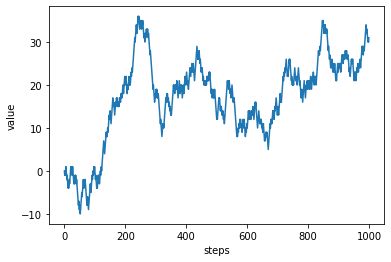

In [8]:
y_values = random_walk(1000)
plt.plot(y_values)
plt.xlabel('steps')
plt.ylabel('value')
plt.show();

In [12]:
# function for generating a series of random steps (similar to third function above but including)
def random_steps(x):
    n = len(x)
    steps = np.random.randint(2, size=n)*2-1
    return x + steps
        
# function for generating a set of random walks as ordered lists of steps
def random_walk_set(t, n):
    y_values = np.zeros((1, n))
    for t in range(t-1):
        next_steps = random_steps(y_values[t,:]) #FIGURE OUT THIS SYNTAX??!?
        y_values = np.vstack((y_values, next_steps))
        
    return y_values

In [ ]:
y_values = random_walk_set(5000, 1000)
plt.plot(y_values, linewidth=0.4)
plt.xlabel('steps')
plt.ylabel('value')
plt.show()

### Students T
Moves between a thin tailed and a fait tailed distribution

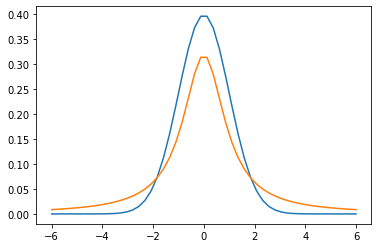

In [23]:
x = np.linspace(-6,6)

students_t_fat = stats.t(1)
students_t_thin = stats.t(1000)

plt.figure()
plt.plot(x, students_t_thin.pdf(x))
plt.plot(x, students_t_fat.pdf(x))



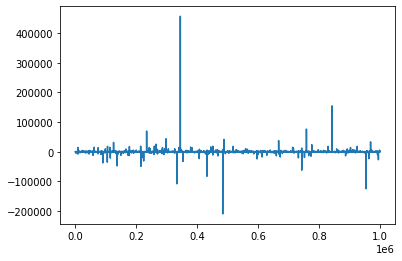

In [27]:
fat_rvs = students_t_fat.rvs(1000000)
plt.plot(fat_rvs)

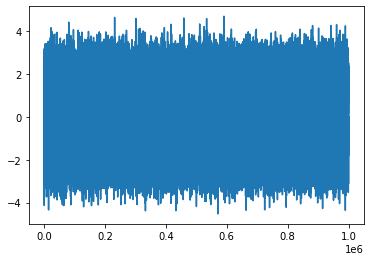

In [26]:
thin_rvs = students_t_thin.rvs(1000000)
plt.plot(thin_rvs)

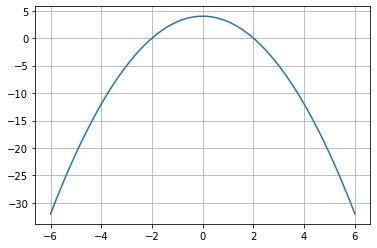

In [28]:
def fragile_behaviour(x):
    return 4-x**2

plt.plot(x, fragile_behaviour(x))
plt.grid()
